In [54]:
import math

RPM = 5676
N = 0.92 # efficiency
R_FUEL = 0.15/2 # radius of the ball
D_WHEEL = 0.1016 # diameter of the wheel
V0 = ((RPM * 2 * math.pi)/60 * D_WHEEL/2)/2 * N # exit velocity
W0 = V0 / R_FUEL # exit angular velocity

m = 0.20366297 # mass of the ball
g = 9.81 # acceleration due to gravity
p = 1.225 # density of air

Cd = 0.47 # drag coefficient
Cl = 0.2 * R_FUEL * W0 / V0 # lift coefficient
A = math.pi*R_FUEL**2 # cross-sectional area

In [55]:
deltaT = 0.00001

In [56]:
def ax(vx,vy):
    return (-1/2 * p * A / m) * (math.sqrt(vx**2 + vy**2)) * (Cd*vx + Cl*vy)
def ay(vx,vy):
    return -g + ((-1/2 * p * A / m) * (math.sqrt(vx**2 + vy**2)) * (Cd*vy - Cl*vx))

In [57]:
def vx(ax, t, oldvx):
    return oldvx + ax * t

def vy(ay, t, oldvy):
    return oldvy + ay * t

def x(vx, t, oldx):
    return oldx + vx * t

def y(vy, t, oldy):
    return oldy + vy * t

# 72 degree lookup table for deciding rpm

In [58]:
import numpy as np

all_scenarios = []

for RPM in range(1000,5767,100):
    V0 = ((RPM * 2 * math.pi)/60 * D_WHEEL/2)/2 * N # exit velocity
    W0 = V0 / R_FUEL # exit angular velocity
    Cl = 0.2 * R_FUEL * W0 / V0 # lift coefficient

    vx0 = V0 * math.cos(math.radians(72))
    vy0 = V0 * math.sin(math.radians(72))
    
    ax0 = ax(vx0,vy0)
    ay0 = ay(vx0,vy0)
    x0 = 0
    y0 = 0.2032

    velocity = []
    position = []

    for t in np.arange(0,3,deltaT):
        newvy = vy(ay0,deltaT,vy0)
        newvx = vx(ax0,deltaT,vx0)
        newy = y(vy0,deltaT,y0)
        newx = x(vx0,deltaT,x0)
        velocity.append((newvx,newvy))
        position.append((newx,newy))
        ay0 = ay(vx0,vy0)
        ax0 = ax(vx0,vy0)
        vy0 = newvy
        vx0 = newvx
        x0 = newx
        y0 = newy
    
    all_scenarios.append({
        "RPM": RPM,
        "Position": position,
        "Velocity": velocity
        })

In [59]:
x = []
y = []

for scenario in all_scenarios:
    counter = 0
    for position in scenario["Position"]:
        x = position[0]
        y = position[1]
        if (y > 1.872 + R_FUEL) & (scenario["Velocity"][counter][1] < 0):
            scenario["distance"] = x
            break
        
        counter += 1


In [60]:
final_table = []
for scenario in all_scenarios:
    try:
        print(f"RPM: {scenario['RPM']}, distance: {scenario['distance']}")
        final_table.append({
            'RPM': scenario['RPM'],
            'distance': scenario['distance']
        })
    except Exception as e:
        continue

RPM: 2600, distance: 1.1058262418697022
RPM: 2700, distance: 1.1842463334304305
RPM: 2800, distance: 1.2644500718254155
RPM: 2900, distance: 1.3463563765624327
RPM: 3000, distance: 1.4298466061311295
RPM: 3100, distance: 1.5148208168528141
RPM: 3200, distance: 1.6011587298418688
RPM: 3300, distance: 1.6887815190641016
RPM: 3400, distance: 1.7775477561709319
RPM: 3500, distance: 1.8673800792050816
RPM: 3600, distance: 1.9581814285587726
RPM: 3700, distance: 2.0498330061671965
RPM: 3800, distance: 2.1422626490884897
RPM: 3900, distance: 2.2353299395438775
RPM: 4000, distance: 2.3289414376014634
RPM: 4100, distance: 2.4230545037309046
RPM: 4200, distance: 2.5175070175826946
RPM: 4300, distance: 2.6122605112386377
RPM: 4400, distance: 2.707204791182415
RPM: 4500, distance: 2.8022562525280286
RPM: 4600, distance: 2.8973334484778883
RPM: 4700, distance: 2.992357131439872
RPM: 4800, distance: 3.0872502874854137
RPM: 4900, distance: 3.1819114368658297
RPM: 5000, distance: 3.276294399569033
RPM

In [61]:
final_table

[{'RPM': 2600, 'distance': 1.1058262418697022},
 {'RPM': 2700, 'distance': 1.1842463334304305},
 {'RPM': 2800, 'distance': 1.2644500718254155},
 {'RPM': 2900, 'distance': 1.3463563765624327},
 {'RPM': 3000, 'distance': 1.4298466061311295},
 {'RPM': 3100, 'distance': 1.5148208168528141},
 {'RPM': 3200, 'distance': 1.6011587298418688},
 {'RPM': 3300, 'distance': 1.6887815190641016},
 {'RPM': 3400, 'distance': 1.7775477561709319},
 {'RPM': 3500, 'distance': 1.8673800792050816},
 {'RPM': 3600, 'distance': 1.9581814285587726},
 {'RPM': 3700, 'distance': 2.0498330061671965},
 {'RPM': 3800, 'distance': 2.1422626490884897},
 {'RPM': 3900, 'distance': 2.2353299395438775},
 {'RPM': 4000, 'distance': 2.3289414376014634},
 {'RPM': 4100, 'distance': 2.4230545037309046},
 {'RPM': 4200, 'distance': 2.5175070175826946},
 {'RPM': 4300, 'distance': 2.6122605112386377},
 {'RPM': 4400, 'distance': 2.707204791182415},
 {'RPM': 4500, 'distance': 2.8022562525280286},
 {'RPM': 4600, 'distance': 2.897333448477

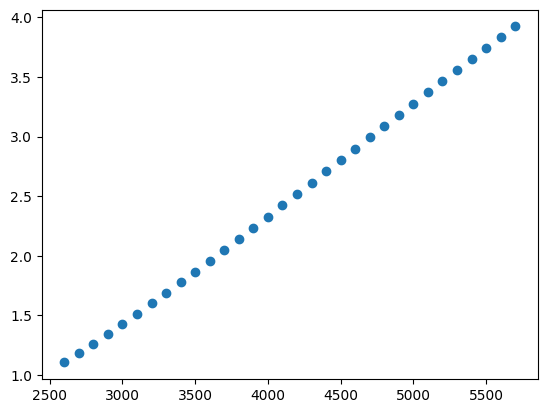

In [37]:
import matplotlib.pyplot as plt

RPMs = [row['RPM'] for row in final_table]
distances = [row['distance'] for row in final_table]

plt.scatter(RPMs,distances)
plt.show()

In [41]:
import csv
import os

with open("topspin.csv", "w") as file:
    writer = csv.DictWriter(file, fieldnames=["distance", "RPM"])
    writer.writeheader()
    writer.writerows(final_table)

In [42]:
x = []
y = []

for d in final_table:
    x.append(d['distance'])
    y.append(d['RPM'])

Optimized: a=3701439.5895, b=32192757.8460, c=-5327.6670, d=0.2654


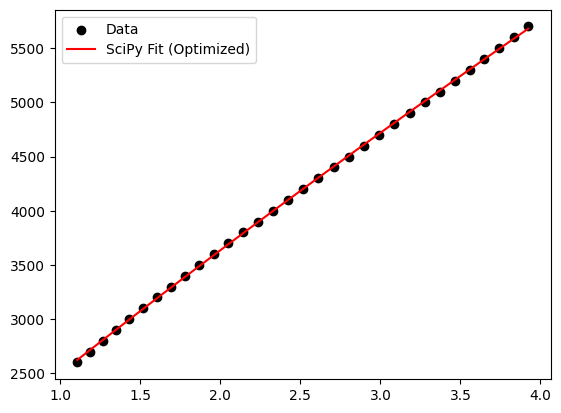

In [ ]:
from scipy.optimize import curve_fit

def model_func(x, a, b, c, d):
    if d == 0: d = 1e-9
    inner = a * x + b
    return (np.sqrt(np.maximum(inner, 0)) + c) / d

x_data = np.array(x)
y_data = np.array(y)

y_sq = (y_data * 1)**2
slope, intercept = np.polyfit(x_data, y_sq, 1)

initial_guess = [max(slope, 0.1), intercept, 0, 1]

low_b = [0, -np.inf, -np.inf, 0.0001]
high_b = [np.inf, np.inf, np.inf, np.inf]

popt, pcov = curve_fit(
    model_func, x_data, y_data, 
    p0=initial_guess, 
    bounds=(low_b, high_b),
    method='trf'
)
    
print(f"Optimized: a={popt[0]:.4f}, b={popt[1]:.4f}, c={popt[2]:.4f}, d={popt[3]:.4f}")

plt.scatter(x_data, y_data, label='Data', color='black')
x_range = np.linspace(min(x_data), max(x_data), 100)
plt.plot(x_range, model_func(x_range, *popt), 'r-', label='SciPy Fit (Optimized)')
plt.legend()
plt.show()

In [48]:
a,b,c,d = popt